# Log File Analysis

Let us import some libraries first for our analysis

* advertools
* pandas 
* user_agent_parser

In [1]:
#for advertising analytics and data manipulation
import advertools as adv

# for analysing data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# parses user agent strings to extract information about user browser , device , OS
from ua_parser import user_agent_parser

import ua_parser

#sets no limit to number of columns displayed
pd.options.display.max_columns = None

# iterate over libraries and tell their versions
for p in[adv,pd]:
  print(f"{p.__name__:-<14} -- {p.__version__}")

advertools---- -- 0.13.4
pandas-------- -- 1.4.4




let us initially check how our data looks in log file .

By seeing firdt 5 lines ..

In [2]:
# checking the first few lines of our log file
log_file_path = "log_file.log"

with open(log_file_path, "r") as f1:
    for i in range(5):  # Adjust the number of lines you want to display
        line = f1.readline()
        if not line:
            break
        print(line, end="")

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"
91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"
91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"
87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHT

Now as we have seen how our data looks 

let us split our log data into 
* log file - contains original log
* output_file - parquet file
* error_file - in txt format
* log_formats - combined / common

using `adv.logs_to_df()`

create these files only if it does not exist 
`import os` library

`if not os.path.exists(name_of_file)`

In [3]:
# measures the time of execution
%time

import os

log_file = 'log_file.log'
output_file = 'output_file_original.parquet'
errors_file = 'errors_file.txt'

# Process log files and convert them into dataframe
# it saves the data in parquet file
if not os.path.exists(output_file) and not os.path.exists(errors_file):
    adv.logs_to_df(
        log_file=log_file,
        output_file=output_file,
        errors_file=errors_file,
        log_format='combined'
    )
else:
    print("Output or errors files already exist.")

Wall time: 0 ns
Output or errors files already exist.


Let us now read our data in parquet format 

In [4]:
%time

# reading the parquet file into pandas dataframe
logs_df = pd.read_parquet('output_file_original.parquet')

Wall time: 0 ns


Now let us first view our first 5 entries of logs_df

In [5]:
logs_df.head(5)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.120.68.47,-,10/Mar/2022:16:22:45 +0200,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
1,87.120.68.47,-,10/Mar/2022:16:22:45 +0200,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
2,87.120.68.47,-,10/Mar/2022:16:22:45 +0200,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
3,87.120.68.47,-,10/Mar/2022:16:22:45 +0200,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
4,87.120.68.47,-,10/Mar/2022:16:22:45 +0200,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...


As we have seen how our data is modified to dataframe using `adv.logs_to_df()`

Let us first clean our datetime column into desired format using `pd.to_datetime(col , format )`

In [6]:
%time

# changing the datetime column into date time format
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

Wall time: 0 ns


Look our date time column have been corrected to desired format.

In [7]:
logs_df.head(5)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
1,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
2,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
3,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
4,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...


**Lets see some insights of logs_df**

In [8]:
print(logs_df.describe())

               size
count  2.163034e+06
mean   4.430781e+04
std    1.051124e+05
min    1.000000e+00
25%    2.148000e+03
50%    1.449800e+04
75%    4.547100e+04
max    4.354082e+06


In [9]:
print(logs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 9 columns):
 #   Column      Dtype   
---  ------      -----   
 0   client      object  
 1   userid      object  
 2   datetime    object  
 3   method      category
 4   request     object  
 5   status      category
 6   size        float64 
 7   referer     object  
 8   user_agent  object  
dtypes: category(2), float64(1), object(6)
memory usage: 134.2+ MB
None


*Now lets explore client column using `reverse_dns_lookup()`

### Reverse DNS lookup 

it gives information from the client column such as 

* IP address 
* count
* cum_count
* perc
* cum_perc
* hostname
* aliaslist
* ipaddrlist
* errors

In [10]:
# Reverse DNS lookup on client column
host_df = adv.reverse_dns_lookup(logs_df['client'])

In [11]:
# Checking rows and columns of host_df 
print(f'rows and columns : {host_df.shape}')

rows and columns : (14245, 9)


let us see the columns 

In [12]:
host_df.columns

Index(['ip_address', 'count', 'cum_count', 'perc', 'cum_perc', 'hostname',
       'aliaslist', 'ipaddrlist', 'errors'],
      dtype='object')

In [13]:
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,178.62.71.222,69632,69632,0.028707,0.028707,None,None,None,[Errno 11004] host not found
1,178.62.81.205,68664,138296,0.028308,0.057014,None,None,None,[Errno 11004] host not found
2,46.101.77.196,68298,206594,0.028157,0.085171,None,None,None,[Errno 11004] host not found
3,91.196.124.220,40230,246824,0.016585,0.101756,ns77.superhosting.bg,,91.196.124.220,None
4,84.238.171.44,27567,274391,0.011365,0.113121,84-238-171-44.ip.btc-net.bg,,84.238.171.44,None


In [14]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14245 entries, 0 to 14244
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ip_address  14245 non-null  object 
 1   count       14245 non-null  int64  
 2   cum_count   14245 non-null  int64  
 3   perc        14245 non-null  float64
 4   cum_perc    14245 non-null  float64
 5   hostname    7395 non-null   object 
 6   aliaslist   7395 non-null   object 
 7   ipaddrlist  7395 non-null   object 
 8   errors      6850 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [15]:
host_df.describe()

,count,cum_count,perc,cum_perc
count,14245.000000,1.424500e+04,1.424500e+04,14245.000000
mean,170.279888,2.229664e+06,7.020007e-05,0.919208
std,1178.940213,3.765357e+05,4.860332e-04,0.155232
min,1.000000,6.963200e+04,4.122628e-07,0.028707
25%,2.000000,2.246338e+06,8.245257e-07,0.926082
50%,8.000000,2.407306e+06,3.298103e-06,0.992443
75%,163.000000,2.421667e+06,6.719884e-05,0.998363
max,69632.000000,2.425637e+06,2.870669e-02,1.000000


### IP ADDRESS

Let us count the unique ip address

In [16]:
unique_ip_address = host_df['ip_address'].nunique()
print(f"number of unique addresses are :{unique_ip_address}" )

number of unique addresses are :14245


Okay so here all ip addresses are unique 

Now let us see type of distribution among ip addresses 

for instance , let us take first 20 ip addresses

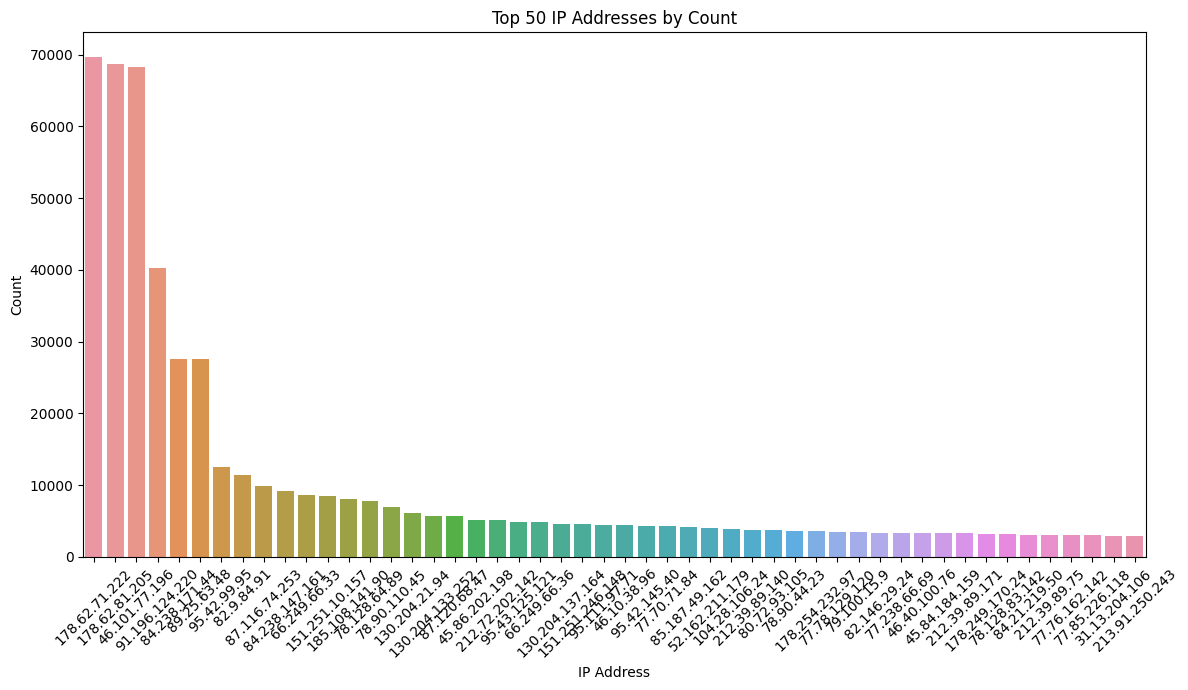

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(data=host_df.head(50), x='ip_address', y='count')
plt.xticks(rotation=45)
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('Top 50 IP Addresses by Count')
plt.tight_layout()
plt.show()

This shows *exponential distribution* among IP Addresses as well as *top 50 IP ADDRESSES* .

Let us see some **most common ip addresses** 

In [18]:
most_common_ip = host_df['ip_address'].value_counts().head(10)
print("Most common IP addresses:")
print(most_common_ip)

Most common IP addresses:
178.62.71.222     1
78.90.233.139     1
51.255.62.1       1
77.77.150.95      1
35.237.35.37      1
54.36.149.92      1
149.62.209.210    1
54.36.148.21      1
77.220.196.226    1
34.73.200.74      1
Name: ip_address, dtype: int64


### Hostname

In [19]:
unique_hostname_count = host_df['hostname'].nunique()
print("Number of unique hostnames:", unique_hostname_count)

Number of unique hostnames: 7209


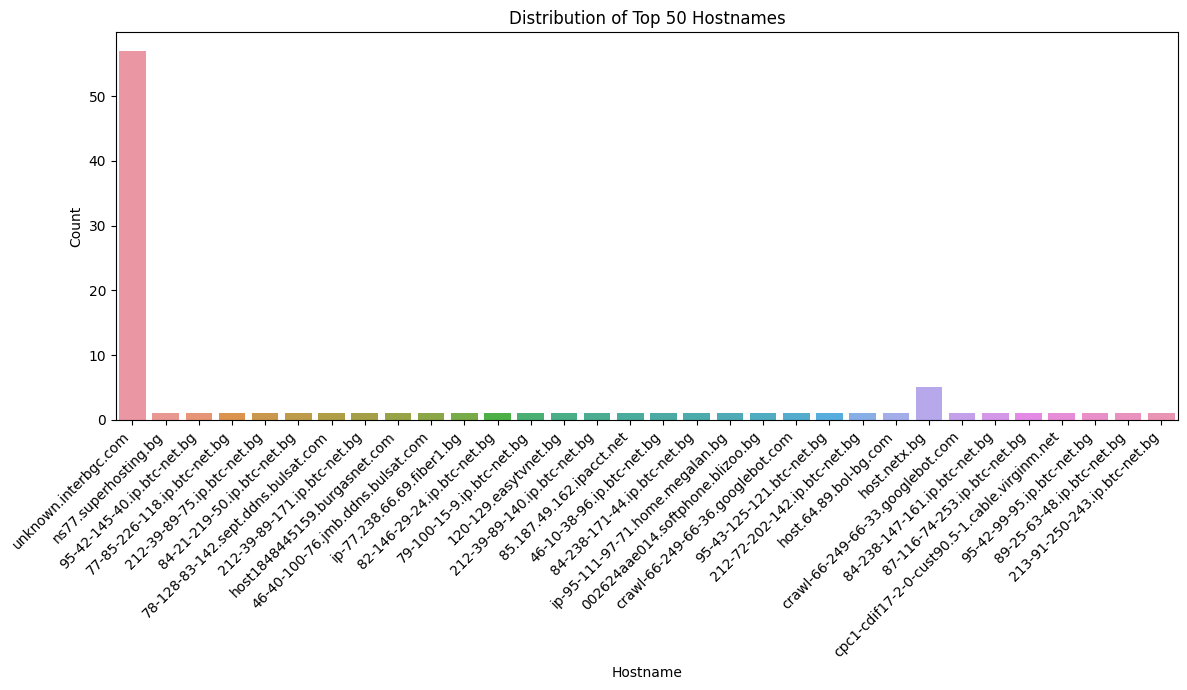

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

x_plot_data = host_df['hostname'].head(50)
plt.figure(figsize=(12, 7))
sns.countplot(data=host_df, x='hostname', order=x_plot_data.value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hostname')
plt.ylabel('Count')
plt.title('Distribution of Top 50 Hostnames')
plt.tight_layout()
plt.show()

Hostnames are almost uniformly distributed


Let us see the *unique top 10 host names* : 

In [21]:
most_common_hostnames = host_df['hostname'].value_counts().head(10)
print("Most common hostnames:")
print(most_common_hostnames)

Most common hostnames:
wordpress.com                   69
unknown.interbgc.com            57
clients-pools.pl.cooolbox.bg    17
cache.google.com                 9
adsl-customer.orbitel.bg         6
host.netx.bg                     5
ns1650.ztomy.com                 4
ip-54-37-22.eu                   4
undefined.hostname.localhost     4
hn.kd.ny.adsl                    3
Name: hostname, dtype: int64


As we have seen some insights let us see information about error types in host_df dataframe.

### Error Types

In [22]:
unique_error_count = host_df['errors'].nunique()
print("Number of unique error types:", unique_error_count)

Number of unique error types: 1


This shows that there are only 1 error type i.e. error 11004 (host not found)

In [23]:
# combing ip address and hostname from host_df dataframe
ip_host_dict = dict(zip(host_df['ip_address'], host_df['hostname']))

In [24]:
# creating a new column hostname in logs_df and then putting the host name from host_df dictionary based on Ip addresses found in client column 
logs_df['hostname'] = [ip_host_dict[ip] for ip in logs_df['client']]

### URLs Processing

### 1)Split the **`request URLs`** into their components.
### 2) Split the **`referer URLs`** into their components.

#### `advertools.url_to_df` : This function likely takes a series of URLs as input and converts them into a DataFrame where each row represents a URL and its components, such as scheme, domain, path, etc.

But for this data we are using `urlparse`



#### Let us first parse request column in logs_df

In [25]:
from urllib.parse import urlparse

# Parse URL components using urlparse and create a DataFrame
request_url_components = logs_df['request'].apply(lambda url: urlparse(url))
request_url_df = pd.DataFrame(request_url_components.tolist(), columns=['scheme', 'netloc', 'path', 'params', 'query', 'fragment'])

# Add a prefix to column names
request_url_df = request_url_df.add_prefix('request_')

In [26]:
request_url_df.shape

(2425637, 6)

In [27]:
print(request_url_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   request_scheme    object
 1   request_netloc    object
 2   request_path      object
 3   request_params    object
 4   request_query     object
 5   request_fragment  object
dtypes: object(6)
memory usage: 111.0+ MB
None


In [28]:
request_url_df.describe()

,request_scheme,request_netloc,request_path,request_params,request_query,request_fragment
count,2425637,2425637,2425637,2425637,2425637,2425637
unique,1,3,19054,6,94495,1
top,,,/,,,
freq,2425637,2425635,85196,2425630,1231207,2425637


In [29]:
#Seeing first 10
request_url_df.head(10)

,request_scheme,request_netloc,request_path,request_params,request_query,request_fragment
0,,,/wp-content/themes/woodmart/js/scripts/wc/wooc...,,ver=6.3.1,
1,,,/wp-content/themes/woodmart/js/libs/magnific-p...,,ver=6.3.1,
2,,,/wp-content/themes/woodmart/js/scripts/wc/acti...,,ver=6.3.1,
3,,,/wp-content/themes/woodmart/js/scripts/element...,,ver=6.3.1,
4,,,/wp-content/themes/woodmart/js/scripts/global/...,,ver=6.3.1,
5,,,/wp-content/themes/woodmart/js/libs/tooltips.m...,,ver=6.3.1,
6,,,/wp-content/themes/woodmart/js/scripts/wc/prod...,,ver=6.3.1,
7,,,/wp-content/themes/woodmart/css/parts/header-e...,,ver=6.3.1,
8,,,/wp-content/themes/woodmart/js/scripts/wc/sing...,,ver=6.3.1,
9,,,/wp-content/themes/woodmart/js/scripts/menu/me...,,ver=6.3.1,


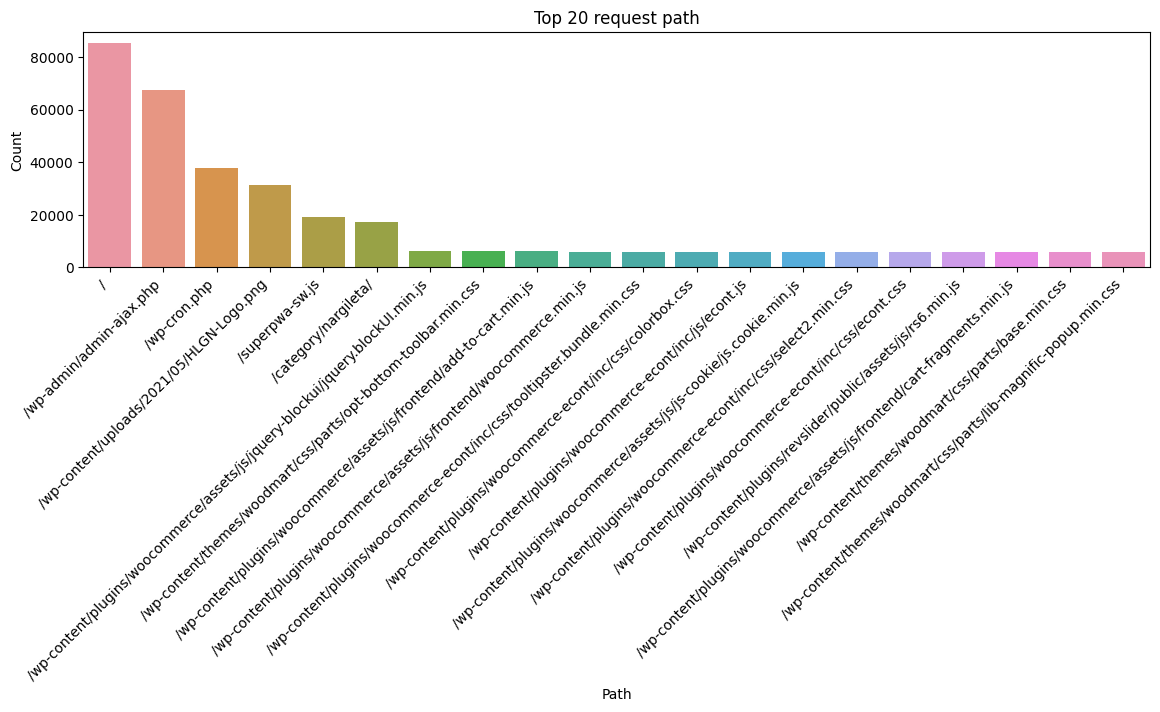

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(data=request_url_df, x='request_path', order=request_url_df['request_path'].value_counts().index[:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Path')
plt.ylabel('Count')
plt.tight_layout()
plt.title("Top 20 request path")
plt.show()


In [31]:
most_common_query = request_url_df['request_query'].value_counts().head(10)
print("Most common network queries:")
print(most_common_query)
print("---------------------------------")
most_common_paths = request_url_df['request_path'].value_counts().head(10)
print("Most common paths:")
print(most_common_paths)


Most common network queries:
                                                                   1231207
ver=6.3.2                                                           431187
ver=6.3.1                                                           142429
ver=6.2.4                                                           131647
ver=1.13.1                                                           27788
ver=6.8.0                                                            26942
ver=5.9.2                                                            25016
wc-ajax=get_refreshed_fragments                                      22431
nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999      20737
_pjax=.main-page-wrapper                                             14946
Name: request_query, dtype: int64
---------------------------------
Most common paths:
/                                                                                 85196
/wp-admin/admin-ajax.php                      

#### Let us first parse referer column in logs_df

In [32]:
#referer_url_df = adv.url_to_df(logs_df['referer'])
# Parse URL components using urlparse and create a DataFrame

referer_url_components = logs_df['referer'].apply(lambda url: urlparse(url))

referer_url_df = pd.DataFrame(referer_url_components.tolist(), columns=['scheme', 'netloc', 'path', 'params', 'query', 'fragment'])

In [33]:
#Adding prefix
referer_url_df = referer_url_df.add_prefix('referer_')

In [34]:
print(f"rows and columns : {referer_url_df.shape}")

rows and columns : (2425637, 6)


In [35]:
print(referer_url_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   referer_scheme    object
 1   referer_netloc    object
 2   referer_path      object
 3   referer_params    object
 4   referer_query     object
 5   referer_fragment  object
dtypes: object(6)
memory usage: 111.0+ MB
None


In [36]:
referer_url_df.describe()

,referer_scheme,referer_netloc,referer_path,referer_params,referer_query,referer_fragment
count,2425637,2425637,2425637,2425637,2425637,2425637
unique,4,75,3073,1,63884,1
top,https,nargile.bg,/,,,
freq,2270623,2259322,339587,2425637,1760991,2425637


In [37]:
#Seeing first 6
referer_url_df.head(6)

,referer_scheme,referer_netloc,referer_path,referer_params,referer_query,referer_fragment
0,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
1,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
2,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
3,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
4,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
5,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,


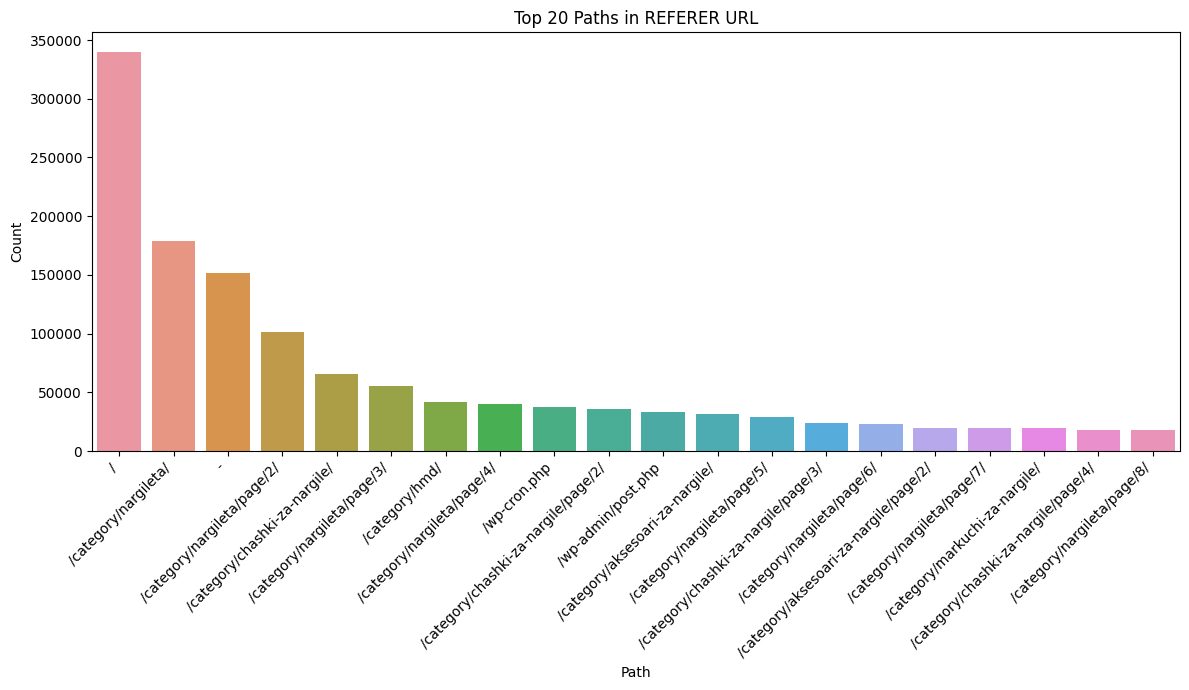

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(data=referer_url_df, x='referer_path', order=referer_url_df['referer_path'].value_counts().index[:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Path')
plt.ylabel('Count')
plt.title("Top 20 Paths in REFERER URL")
plt.tight_layout()
plt.show()

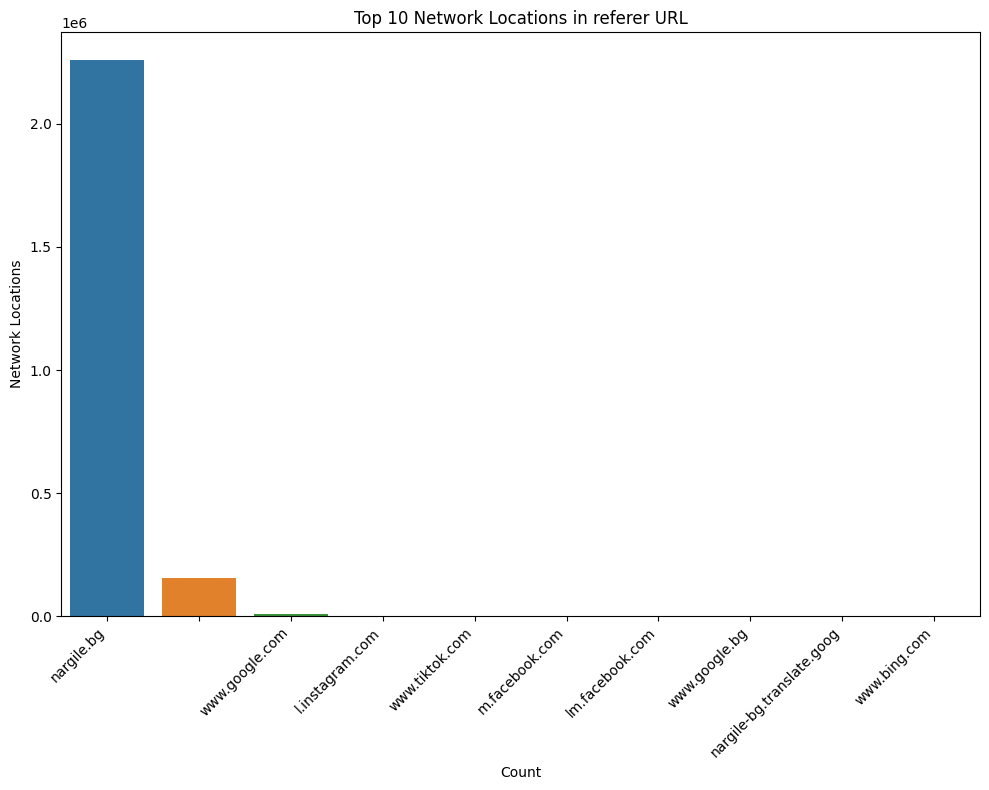

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(data=referer_url_df, x='referer_netloc', order=referer_url_df['referer_netloc'].value_counts().index[:10])
plt.xlabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Network Locations')
plt.title('Top 10 Network Locations in referer URL')
plt.tight_layout()
plt.show()

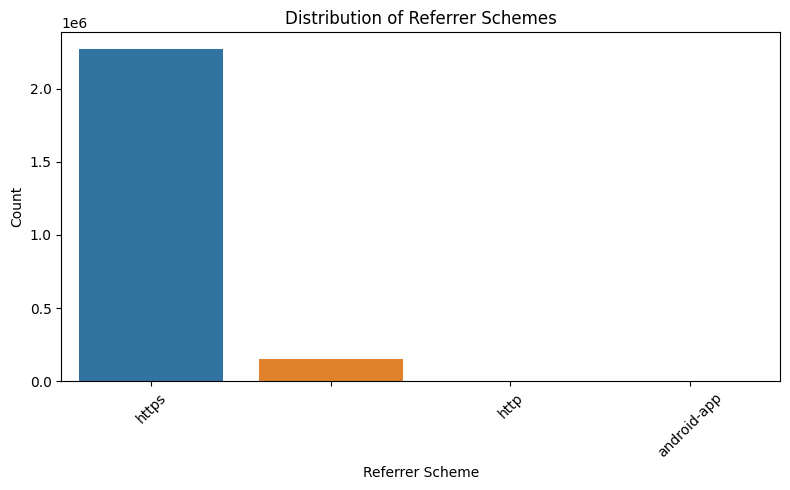

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=referer_url_df, x='referer_scheme')
plt.xlabel('Referrer Scheme')
plt.ylabel('Count')
plt.title('Distribution of Referrer Schemes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows that all the *referer request* are from the **safe url sites** 

## parsing user agent 


#### Now let us parse user_agent column 

Every row in user_agent column in logs_df , parse the user agent using `user_agent_parser.parse()`

`json.normalize()` - for conversion of dictionary into dataframe 

In [41]:
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])

In [42]:
#Converting columns of ua_df to ua_ + name
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

In [43]:
ua_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 13 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ua_string          object
 1   ua_family          object
 2   ua_major           object
 3   ua_minor           object
 4   ua_patch           object
 5   ua_os.family       object
 6   ua_os.major        object
 7   ua_os.minor        object
 8   ua_os.patch        object
 9   ua_os.patch_minor  object
 10  ua_device.family   object
 11  ua_device.brand    object
 12  ua_device.model    object
dtypes: object(13)
memory usage: 240.6+ MB


In [44]:
ua_df.describe()

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
count,2425637,2425637,2353987,2351740,1614302,2425637,2315711,1295944,957905,1,2425637,1976330,1976310
unique,3797,101,160,36,189,11,19,19,8,1,420,21,420
top,Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like...,Mobile Safari,99,0,4844,iOS,10,3,1,8,iPhone,Apple,iPhone
freq,372584,612288,661477,1571309,625246,902375,827606,569762,590817,1,900018,1116681,762278


Let us now see the first 6 rows of our user agent dataframe

In [45]:
ua_df.head(6)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
1,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
2,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
3,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
4,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
5,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B


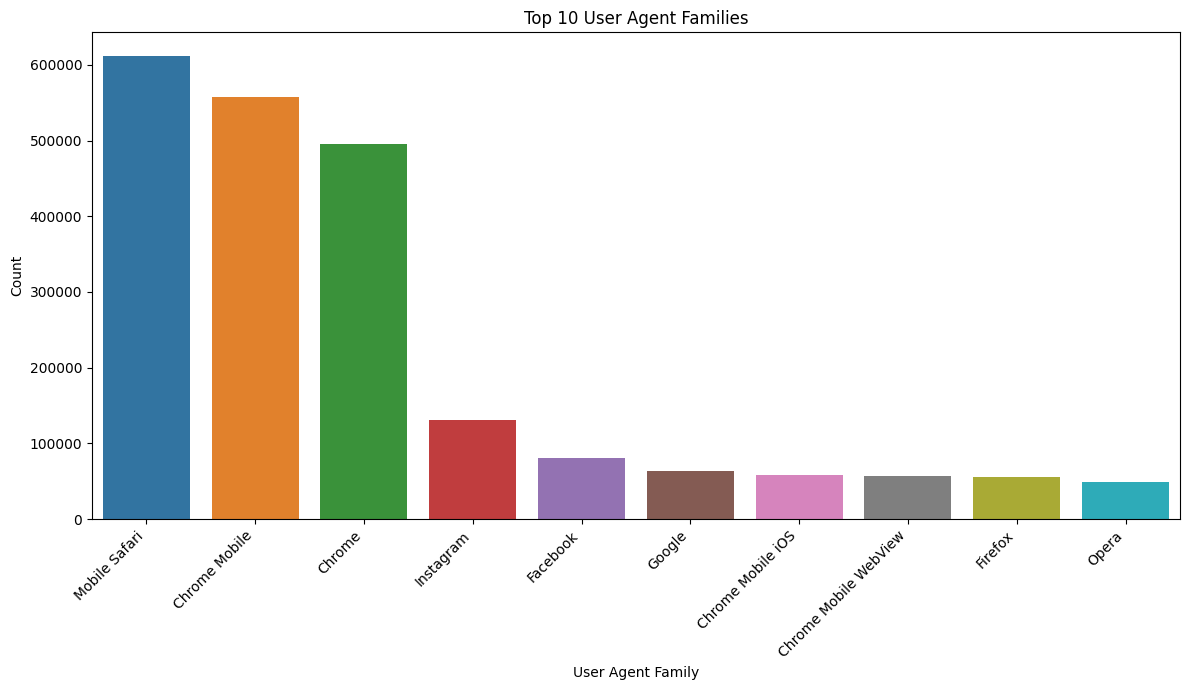

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(data=ua_df, x='ua_family', order=ua_df['ua_family'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('User Agent Family')
plt.ylabel('Count')
plt.title('Top 10 User Agent Families')
plt.tight_layout()
plt.show()

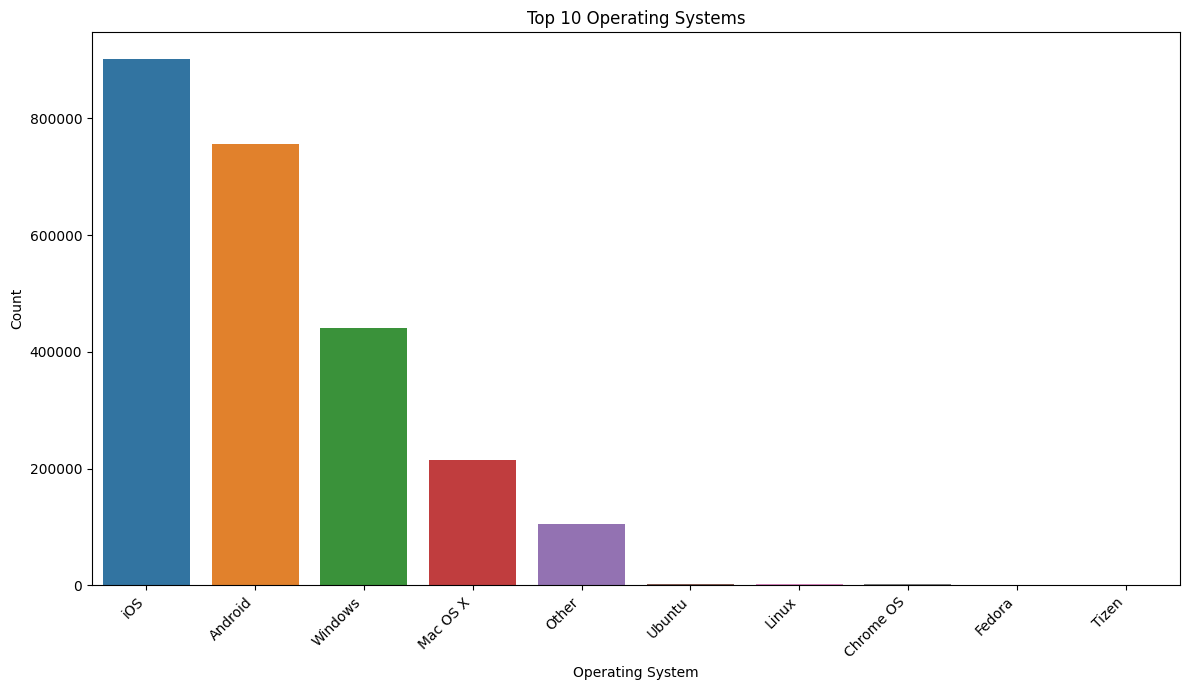

In [47]:
plt.figure(figsize=(12, 7))
sns.countplot(data=ua_df, x='ua_os.family', order=ua_df['ua_os.family'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Top 10 Operating Systems')
plt.tight_layout()
plt.show()

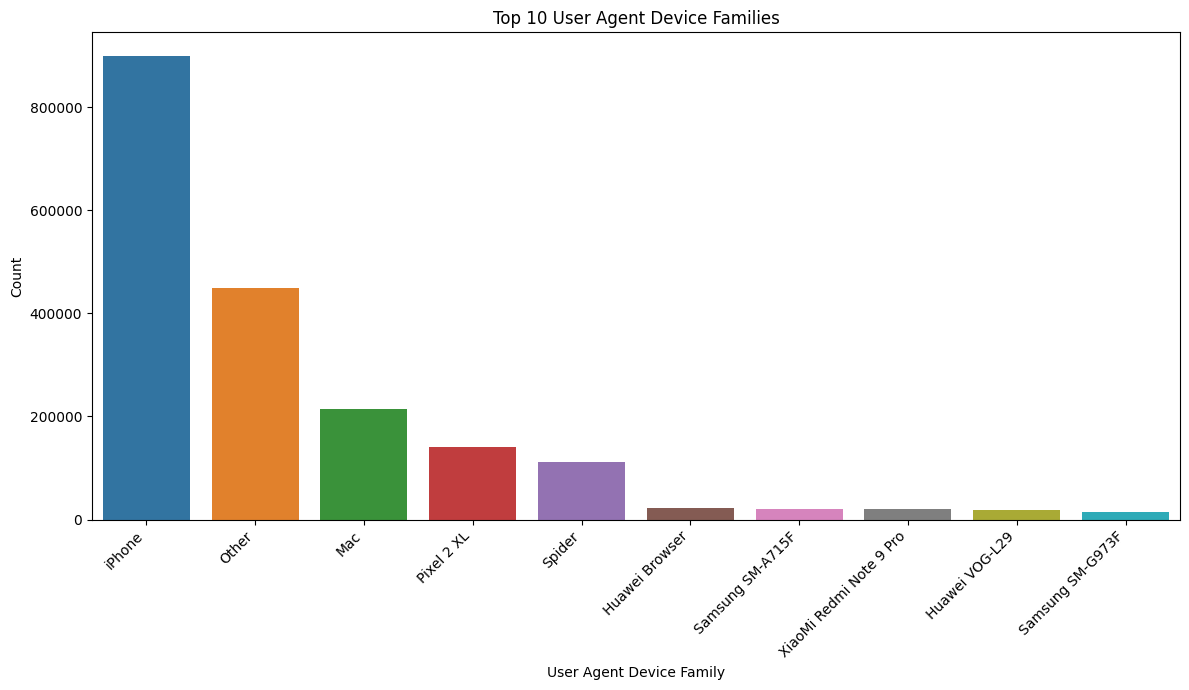

In [48]:
plt.figure(figsize=(12, 7))
sns.countplot(data=ua_df, x='ua_device.family', order=ua_df['ua_device.family'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('User Agent Device Family')
plt.ylabel('Count')
plt.title('Top 10 User Agent Device Families')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

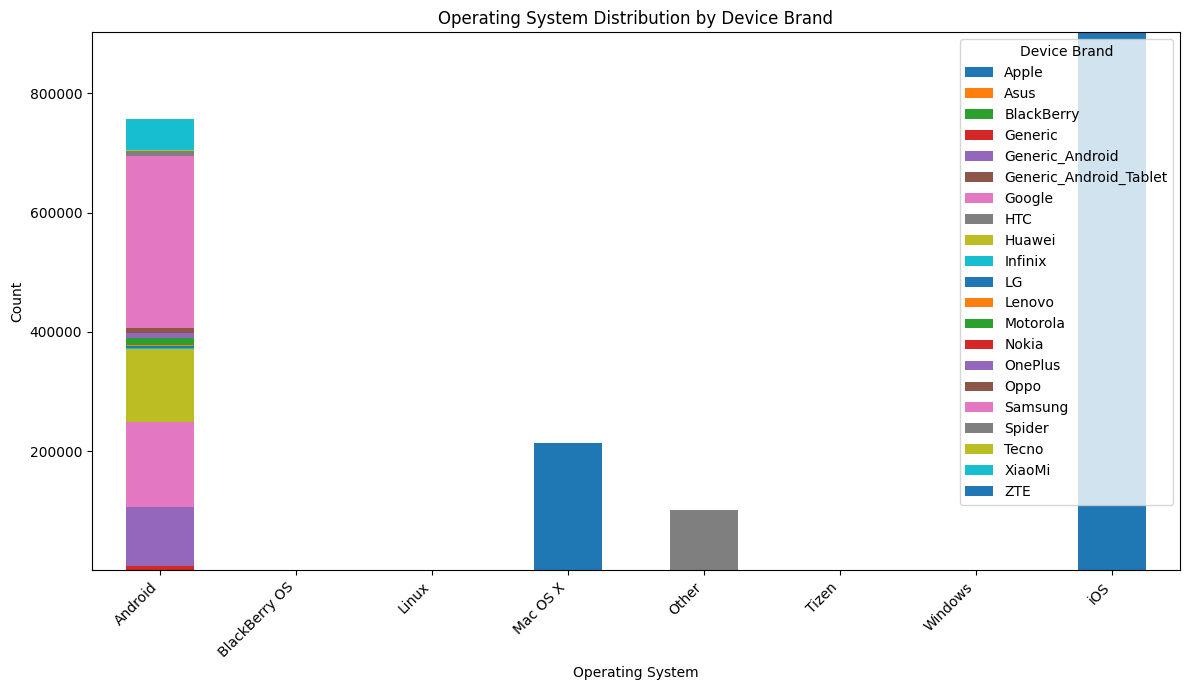

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette
palette = sns.color_palette("tab10")

plt.figure(figsize=(12, 7))
grouped_data = ua_df.groupby(['ua_os.family', 'ua_device.brand']).size().unstack(fill_value=0)

# Create the stacked bar plot with the defined color palette
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 7), color=palette)

plt.xlabel('Operating System')
plt.ylabel('Count')
plt.title('Operating System Distribution by Device Brand')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Device Brand')
plt.tight_layout()
plt.show()


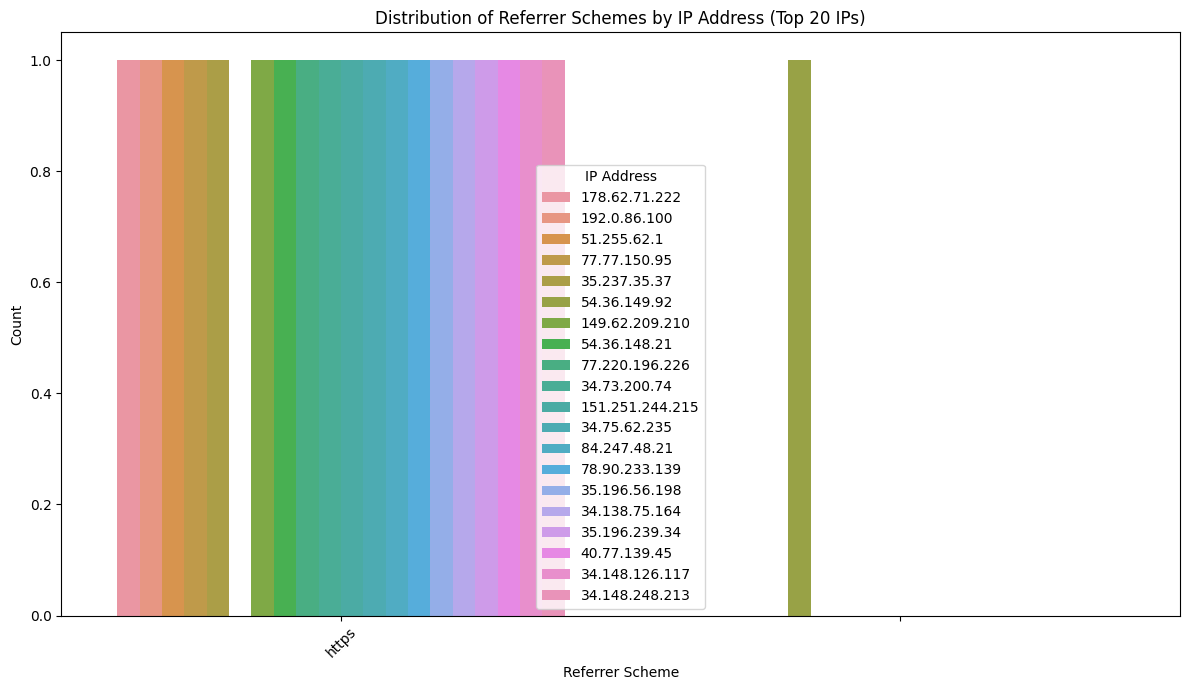

In [50]:
merged_df = referer_url_df.merge(host_df, left_index=True, right_index=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
top_ip_addresses = merged_df['ip_address'].value_counts().index[:20]
sns.countplot(data=merged_df[merged_df['ip_address'].isin(top_ip_addresses)], x='referer_scheme', hue='ip_address')
plt.xlabel('Referrer Scheme')
plt.ylabel('Count')
plt.title('Distribution of Referrer Schemes by IP Address (Top 20 IPs)')
plt.xticks(rotation=45)
plt.legend(title='IP Address')
plt.tight_layout()
plt.show()

### Let us see the distribution of status codes

   status    count
0     200  2187390
1     201       12
2     206      163
3     301    14376
4     302     2020
5     303        9
6     304   157070
7     400      117
8     401      542
9     403      136
10    404    53468
11    405      561
12    406     2768
13    421        2
14    500     6824
15    502        1
16    503      178


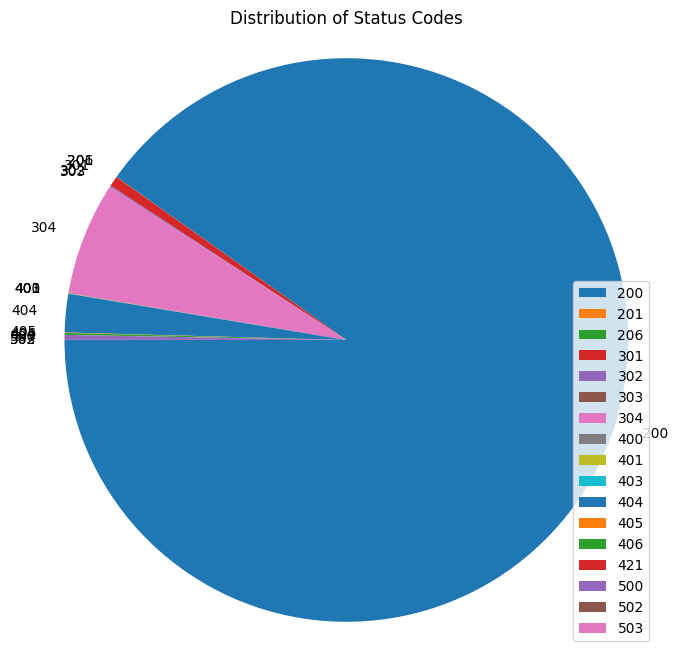

In [51]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)

plt.figure(figsize=(8, 8))
plt.pie(status_df['count'], labels=status_df['status'], startangle=180)
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

Let us now see some more insights on log_df dataframe

let us see first few rows of log_df dataframe

In [52]:
logs_df.head(5)

,client,userid,datetime,method,request,status,size,referer,user_agent,hostname
0,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,None
1,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,None
2,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,None
3,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,None
4,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,None


In [53]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 10 columns):
 #   Column      Dtype   
---  ------      -----   
 0   client      object  
 1   userid      object  
 2   datetime    object  
 3   method      category
 4   request     object  
 5   status      category
 6   size        float64 
 7   referer     object  
 8   user_agent  object  
 9   hostname    object  
dtypes: category(2), float64(1), object(7)
memory usage: 152.7+ MB


### Let us see some more beautiful graphs to know more about our data .




Using `resample('H').size()` , the code calculates the number of hits for each hour ('H' for hourly) and then uses .nlargest(10) to get the top 10 hours with the highest hit counts.

We can also get minute : `T`

It also finds the URL with the maximum hits using .idxmax().

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Convert 'datetime' column to datetime format
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

In [56]:
# Set 'datetime' column as the DataFrame index
logs_df.set_index('datetime', inplace=True)

Text(0, 0.5, 'Count')

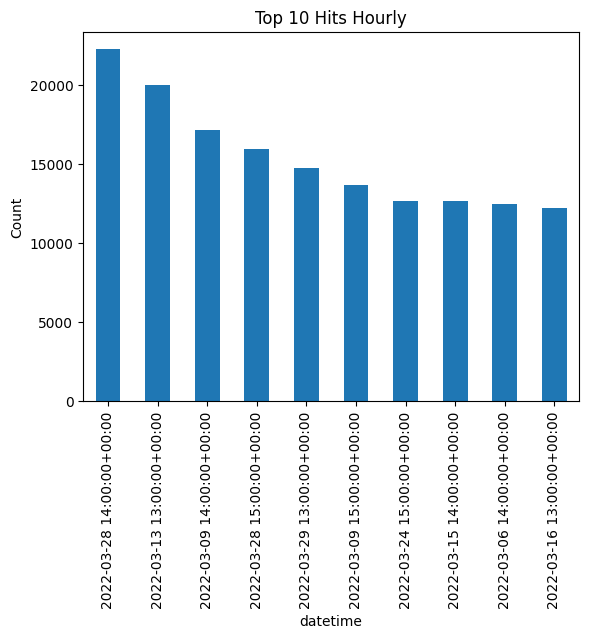

In [57]:
# Plot 1: Top 10 hits on hourly basis (Bar Plot)
top_10_hourly_hits = logs_df['client'].resample('H').size().nlargest(10)
top_10_hourly_hits.plot(kind='bar', title='Top 10 Hits Hourly').set_ylabel('Count')

Text(0, 0.5, 'Count')

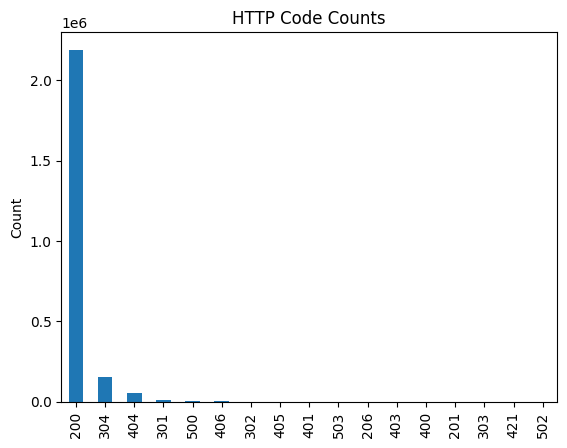

In [58]:
# Plot 2: Total hits per http code (Bar Plot)
http_code_counts = logs_df['status'].value_counts()
http_code_counts.plot(kind='bar', title='HTTP Code Counts').set_ylabel('Count')

Text(0, 0.5, 'Traffic Size')

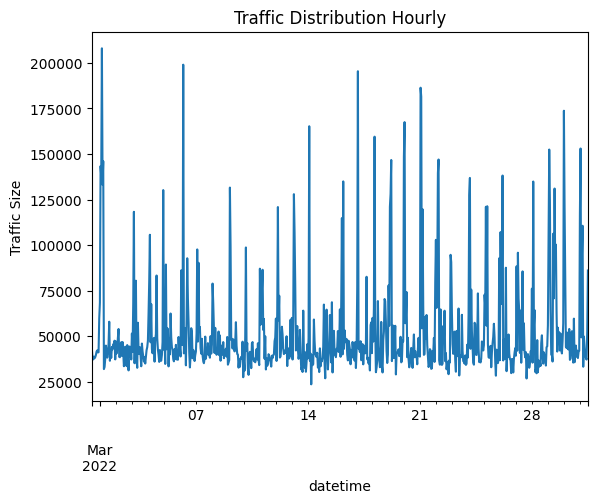

In [59]:
# Plot 5: Traffic distribution on each site hourly basis (Line Plot)
traffic_distribution_hourly = logs_df['size'].resample('H').sum() / logs_df['size'].resample('H').count()
traffic_distribution_hourly.plot(kind='line', title='Traffic Distribution Hourly').set_ylabel('Traffic Size')

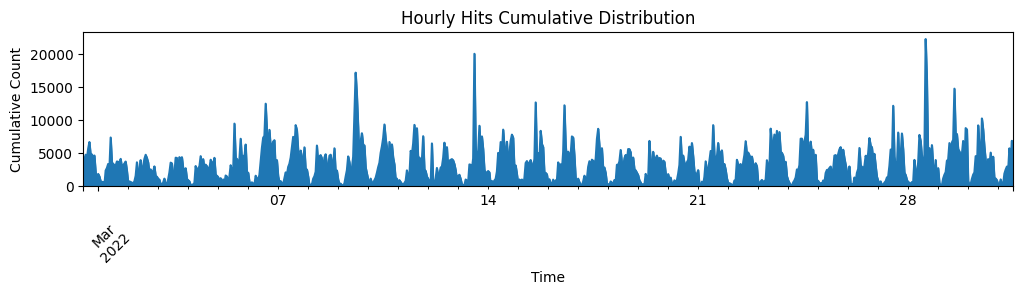

In [65]:
# Resample at an hourly frequency and calculate hits per hour
hourly_hits = logs_df.resample('H').size()

# Plot hits per hour using an area plot
plt.figure(figsize=(12, 2))
hourly_hits.plot(kind='area', title='Hourly Hits Cumulative Distribution')
plt.xlabel('Time')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45)
plt.show()

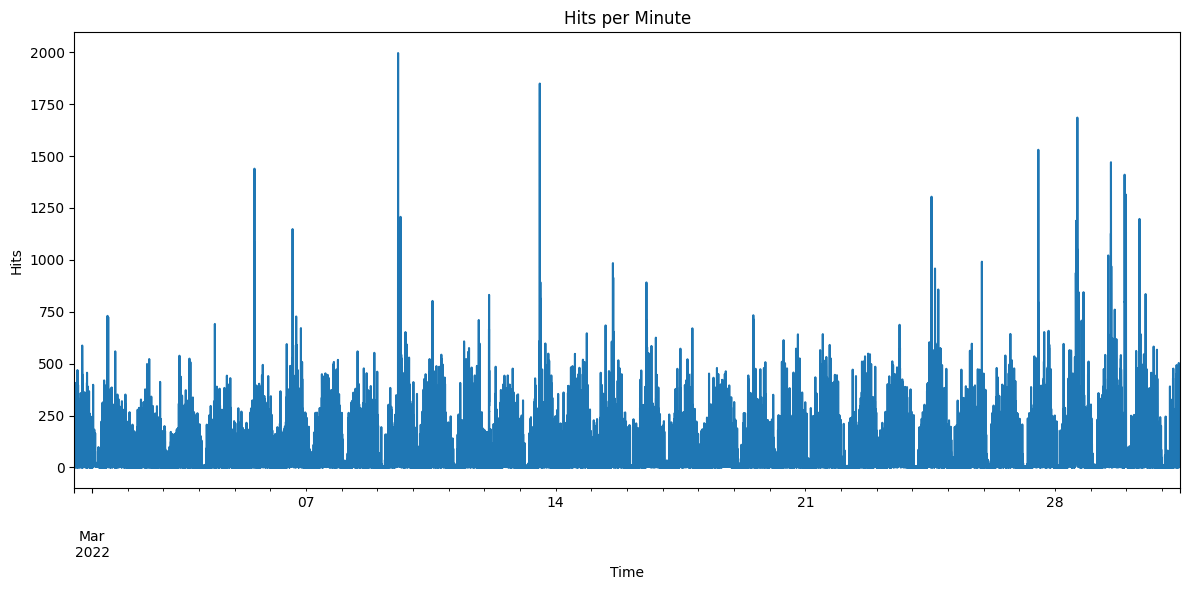

In [66]:
# Resample at a minute-level frequency and calculate hits per minute
hits_per_minute = logs_df.resample('T').size()

# Plot hits per minute
plt.figure(figsize=(12, 6))
hits_per_minute.plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Hits')
plt.title('Hits per Minute')
plt.tight_layout()
plt.show()

## We have successfully seen some awesome insights of apache log file and analysed to best of our knowledge 

**Sources**:
* advertools documentation
* pandas documentation 
* ChatGpt 
* Google